#Artificial Neural Network

Importing The Libraries

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

#Data Preprocessing

In [33]:
#Importing the Dataset
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [34]:
#Label Enconding the Gender Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [35]:
# One Hot Enconding the Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [36]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Building The ANN

In [38]:
#Initializing the ANN
train_ann = tf.keras.models.Sequential()
#Adding the Input Layer
train_ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#Adding the Hidden Layers
train_ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
train_ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
#Adding the Output Layer
train_ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

#Training the ANN

In [39]:
#Compiling the ANN
train_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
#Training the ANN on the Training Set
train_ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8030 - loss: 0.5763
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7898 - loss: 0.4922
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.4516
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.4458
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.4282
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4213
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.4094
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.3864
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8246 - loss: 0.3962
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8316 - loss: 0.3890
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8342 - loss: 0.3899
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

#Predicting and Evaluating the Training Results

In [41]:
#Predicting
y_pred = train_ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


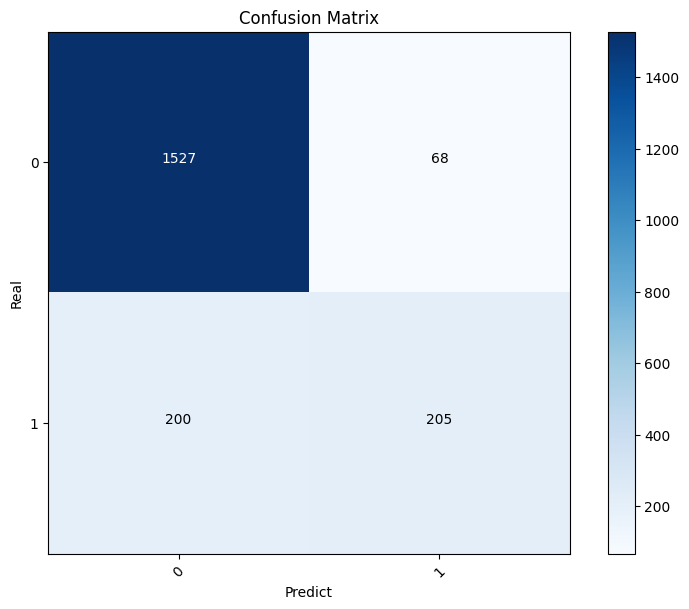

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

#Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
classes = list(range(cm.shape[0]))

title = 'Confusion Matrix'
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Real')
plt.xlabel('Predict')
plt.show()

In [43]:
from sklearn.metrics import classification_report
#Printing the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



#Training The ANN With The Complete Dataset

In [44]:
#Feature Scalling
x = sc.transform(x)

In [45]:
#Building the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [46]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
#Training the ANN on the Training Set
ann.fit(x, y, batch_size = 32, epochs = 100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7514 - loss: 0.6146
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.4885
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4518
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4243
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.4131
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.4009
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8445 - loss: 0.3799
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8471 - loss: 0.3726
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8536 - loss: 0.3645
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8547 - loss: 0.3493
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8574 - loss: 0.3436
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━

# Predicting a Single Observation

**Customer**
Geography: France
Score: 600
Gender: Male
Age: 40 Years
Tenure: 3 Years
Balance: 60000
N° Products: 2
Credit Card: Yes
Active Member: Yes
Salary: $50000

In [48]:
predict = ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))
print(predict > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[False]]
